In [24]:
import rtree


# https://github.com/Toblerity/rtree/blob/master/docs/source/tutorial.txt
from rtree import index
idx = index.Index()

# left, bottom, right, top = (0.0, 0.0, 1.0, 1.0)

idx.insert(0, (0,0,10,10))
idx.insert(0, (4,4,8,8))

for id in idx.intersection(coordinates=(5,5)):
    print (id)

0
0


In [34]:
import matplotlib.path as mplPath
import numpy as np

poly = [190, 50, 500, 310]
poly_path = mplPath.Path(np.array([ [50, 50],
                                    [50, 100],
                                    [100, 100],
                                    [100, 50]]))
point = ([51, 51],[52, 52])
print(point, " is in polygon: ", poly_path.contains_points(point))

print(point, " is in polygon: ", poly_path.intersects_path())

([51, 51], [52, 52])  is in polygon:  [ True  True]


TypeError: Path.intersects_path() missing 1 required positional argument: 'other'

In [44]:
# https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html
# https://www.matecdev.com/posts/point-in-polygon.html
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(0,0)
p2 = Point(10,10)

# Create a Polygon
coords = [(0,0), (50,0), (50,50), (50,0)]
poly = Polygon(coords)

print (poly.bounds)

print(p1.within(poly))
print(p2.within(poly))
print(poly.intersects(p1))
print(poly.intersects(p2))

(0.0, 0.0, 50.0, 50.0)
False
True
True
True


In [13]:
# https://pygeos.readthedocs.io/en/stable/strtree.html
import pygeos as pg
import numpy as np

point_1 = pg.Geometry("POINT (0 0)")
geometry = pg.Geometry("POLYGON((0 0, 0 10, 10 10, 10 0, 0 0))")

print(point_1)
print(geometry)

# bring in all new positions
tree = pg.STRtree(pg.points(np.arange(10), np.arange(10)))

# Query geometries that overlap envelope of input geometries:

# check for all shapes
tree.query(pg.box(2.1, 2.1, 4, 4)).tolist()
# [2, 3, 4]

# # Query geometries that are contained by input geometry:

# tree.query(pygeos.box(2, 2, 4, 4), predicate='contains').tolist()
# # [3]

# # Query geometries that overlap envelopes of ``geoms``
# tree.query_bulk([pygeos.box(2, 2, 4, 4), pygeos.box(5, 5, 6, 6)]).tolist()
# # [[0, 0, 0, 1, 1], [2, 3, 4, 5, 6]]

# tree.nearest([pygeos.points(1,1), pygeos.points(3,5)]).tolist()  
# # [[0, 1], [1, 4]]

POINT (0 0)
POLYGON ((0 0, 0 10, 10 10, 10 0, 0 0))


[3, 4]

[10. 50. 55. 20. 30.  0.]
[ 0.  8. 40. 20. 50. 45.]
[968 104 994 185 903 368 975 752 745  75 900 645 336 297 161 380  42  74
 919 293 787 102 514 893 677 329 299  91 840  49 196 202 396 234 623 538
 660 449 905 137 281  97 984 622 304 479 562  76 222 248 105  41  22 609
 199  21  56 458 796  23 759 254 300 981 854 140 289 177 950 101 961 697
 701 253 437 692 737 509 617 406 424 630 120 186 156  10  36 885 625 672
 727 138 515 318  54 598  79  11  92 634 417 714   7 951 746 699 768   9
 628 333 315 894 734 452 243 687 756  72 534 429 715 423 569 842  17 214
 168 556 670 367  61 319 159 779 366 119 162 485 747 673 561 415 191 442
 328 571  46 895 760 124 585 781 496 182 435 459 879 572 909 825 682 648
 592 867 647 233 750 219  31 633 558  18 197 964 831 828 463 947 352 754
 888 145 407   1 922 886 517 188 426 263 823 422 418 155 946 205 345 529
 728 597 788 987 208 744 730 526 811 911  77 613 468 207 518 591 386 970
 541 135 938 805 150  13 841 584 317 413 631 732 543 343 306 817 810 532

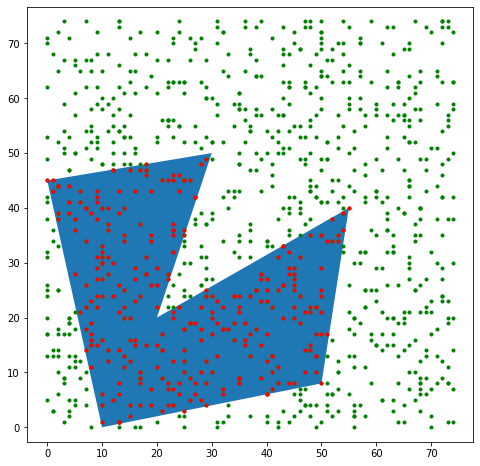

In [183]:
import numpy as np
import pygeos as pg
import geopandas as gp
import matplotlib.pyplot as plt

# https://gis.stackexchange.com/questions/353619/shapely-with-rtree-versus-strtree

points = "10 0 50 8 55 40 20 20 30 50 0 45"

p = np.fromstring(points, sep =" ")

x = p[0::2] # take every second value start by 0
y = p[1::2] # take every second value start by 1

print (x)
print (y)

pointList = np.random.randint(75, size=2*1000)
# pointList = [-1,-1,10,0]
# print(pointList)

x_ = pointList[0::2]
y_ = pointList[1::2]

# store points in tree
tree = pg.STRtree(pg.points(x_, y_))

# geoms = pg.points()

# pg.creation.polygons(pg.points(points))
# poly = pg.polygons([[0, 0], [0, 10], [10, 10], [10, 0]])
#  p.reshape(-1,2) # the unspecified value is inferred to len(p)/2
coords = p.reshape(-1,2)
poly = pg.polygons(coords)

# https://pygeos.readthedocs.io/en/latest/strtree.html#
indices = tree.query(poly, predicate='intersects')  # interects is important!!

print(indices)

pointsIN = np.take( pointList.reshape(-1,2), indices, 0)

# print(pointsIN)

pp = pointsIN.reshape(-1,1)
# print(pp[::2], pp[1::2])

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.plot(x_,y_, "g.", linestyle ='')
plt.plot(pp[::2],pp[1::2], "r.", linestyle ='')
plt.fill(x,y)
plt.show()


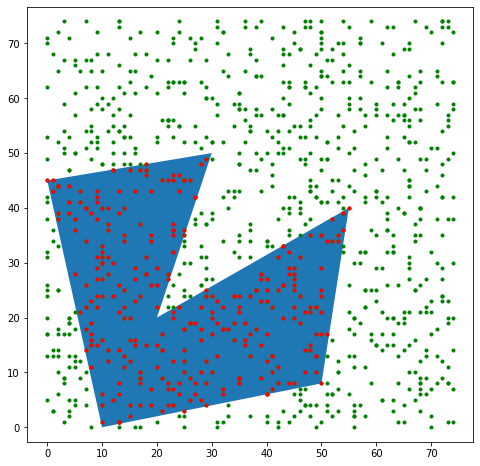

In [189]:
plt.figure(figsize=(8, 8))
plt.xlim(15,25)
plt.xlim(20,40)
plt.axis('equal')
plt.plot(x_,y_, "g.", linestyle ='')
plt.plot(pp[::2],pp[1::2], "r.", linestyle ='')
plt.fill(x,y)




plt.show()